# Streaming Entropy
The streaming entropy code was designed to approximate the entropy of a data stream. This works by approximating the
distribution using histograms, and then applying sovdat entropy updates.

Reference:
    https://arxiv.org/pdf/1403.6348.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

from KML.statistics.summary.StreamingEntropy import PyStreamingEntropy as pyentropy

## Define parameters

In [2]:
num_bins = 100
window_size = 1000

## Define data

In [3]:
np.random.seed(42)
uniform_data = np.random.uniform(0, 1, 1000)
constant_data = np.ones(1000)

## Compare approximations across different datasets

By comparing the approximation on datasets where entropy should clearly be defined, we can get an understanding
of how close the approximation is.

### Constant data

Data that contains only a single value. The expected entropy of this dataset should be zero.

#### Visualize

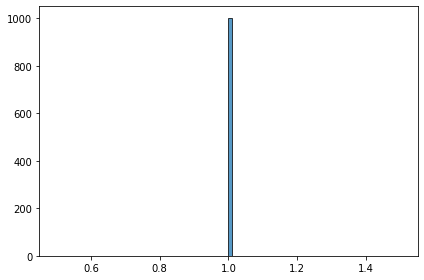

In [4]:
fig, ax = plt.subplots(1, tight_layout=True)
_ = ax.hist(
    constant_data, bins=num_bins, align="mid", ec="black", alpha=0.75, linewidth=1
)

#### Calculate

In [5]:
e = pyentropy(window_size, num_bins)
e.update(constant_data)

In [6]:
e.evaluate()

0.0

### Uniform data
This data set is drawn from a uniform distribution. The expected entropy should be close to the maximum entropy for 
a dataset. In this instance, the expected entropy should be np.log2(1000).

#### Visualize

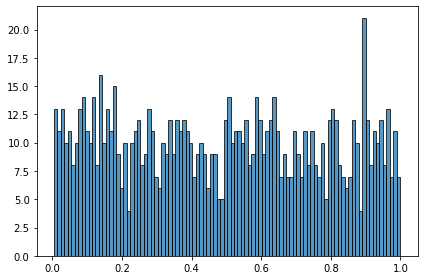

In [7]:
fig, ax = plt.subplots(1, tight_layout=True)
_ = ax.hist(
    uniform_data, bins=num_bins, align="mid", ec="black", alpha=0.75, linewidth=1
)

#### Calculate

In [8]:
e = pyentropy(window_size, num_bins)
e.update(uniform_data)

In [9]:
e.evaluate()

7.330546350478285

In [10]:
np.log2(1000)

9.965784284662087

#### Why is there a big difference between the expected and approximated?
The difference in calculated value is due to the number of bins used to approximate the entropy. If the num_bins parameter 
was set to 1000, the error would be much smaller.